### MNIST Dataset
- An approach to classify the famous MNIST dataset using Naive Bayes

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

#### Loading the dataset

In [6]:
digits = load_digits()

In [7]:
X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

#### Visualising single data

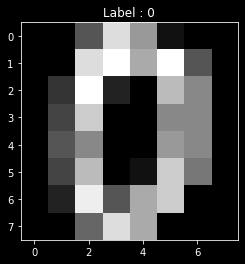

In [10]:
plt.imshow(X[0].reshape(8,8), cmap="gray")
plt.title(f"Label : {y[0]}")
plt.show()

In [11]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


We can see that this is a 16 channel grayscale image, hence can be classified using `multinomial naive bayes` as there are 16 distinct values

But these can also be treated as continous values, so we try using `gaussian naive bayes` too and find which one gives us a better result

#### Training the data

In [12]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [13]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [14]:
gnb.fit(X, y)
mnb.fit(X, y)

MultinomialNB()

#### Testing the data

In [15]:
print("Gaussian:", gnb.score(X, y))
print("Multinomial:", mnb.score(X,y))

Gaussian: 0.8580968280467446
Multinomial: 0.9053978853644964


We see that Multinomial > Gaussian

The result is as expected, because the grayscale image was essentially 16 discrete values, and multinomial is the perfect case for that

#### Cross Validation Score
- A better score as it cross validates on different data

In [17]:
cross_val_score(gnb, X, y, scoring="accuracy", cv=10).mean()

0.8113904407200497

In [19]:
cross_val_score(mnb, X, y, scoring="accuracy", cv=10).mean()

0.8797858472998138

We still get MNB > GNB